# Entrega 2

In [63]:
#--Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
#Datos
data = pd.read_csv('Cars93.csv')
data.keys()
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [65]:
# Llenar los datos Nan con la media 
data['Luggage.room']=data['Luggage.room'].fillna(data['Luggage.room'].mean())
data['Rear.seat.room']=data['Rear.seat.room'].fillna(data['Rear.seat.room'].mean())

In [66]:
data.isnull().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

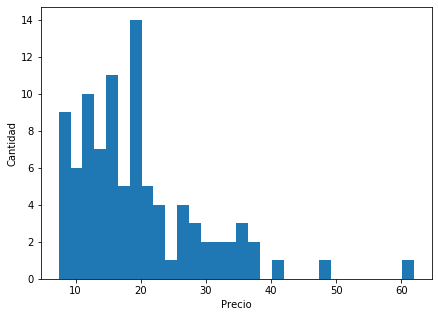

In [72]:
#Varible de 
y='Price'
#Histrograma de precios 
fig= plt.figure(figsize=(7,5))
plt.hist(data['Price'],bins=30)
plt.ylabel('Cantidad')
plt.xlabel('Precio')
plt.show()

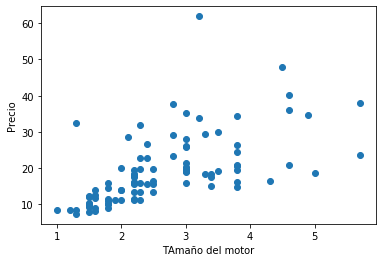

In [76]:
plt.scatter(data['EngineSize'],data[y])
plt.ylabel('Precio')
plt.xlabel('Tamaño del motor')
plt.show()

<BarContainer object of 93 artists>

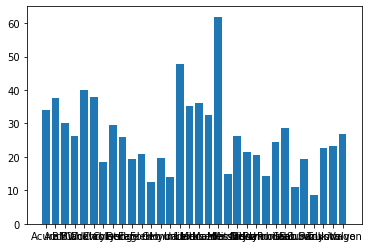

In [78]:
plt.bar(data['Manufacturer'],data['Price'])

In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

RandomForestClassifier()

In [81]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=917d858f6abb0d56c56f0723d8ba56f942f7226fec54401b6d7bb7eee20b2e5c
  Stored in directory: c:\users\juan\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


You should consider upgrading via the 'c:\users\juan\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.
